In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
def list_files_in_folder(folder_path):
    file_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_paths.append(os.path.join(root, file))
    return file_paths

def dict_df(file_paths):
    dict_df = {}
    for path in file_paths:
        df = pd.read_csv(path)
        df_name = path.split('\\')[-1].split('.')[0]
        dict_df[df_name] = df
    return dict_df

scaled_list = list_files_in_folder('model_results/scaled')
not_scaled_list = list_files_in_folder('model_results/st')

scaled_dict = dict_df(scaled_list)
not_scaled_dict = dict_df(not_scaled_list)

In [11]:
df=not_scaled_dict['svm_results']

In [12]:
def extract_std(s):
    parts = s.strip('()').split(', ')
    return float(parts[1])
def clean_metric(s):
    return s.strip('()').split(', ')[0]

def clean_df(df):
    metrics = ['AUC', 'Accuracy', 'f1', 'Recall', 'Precision', 'Average Precision', 'Sensitivity', 'Specificity', 'MCC']
    df=df.copy()

    for metric in metrics:
        df[f"{metric}_st"] = df[metric].apply(extract_std).apply(pd.to_numeric, errors='coerce').round(2)
        df[metric] = df[metric].apply(clean_metric).apply(pd.to_numeric, errors='coerce').round(2)

        df.rename(columns={metric: metric.replace('_st', '')}, inplace=True)


    metric_st = [[metric,f"{metric}_st"] for metric in metrics]

    metric_names=["dataset_name","model"]
    st_names=["dataset_name","model"]
    for tuple in metric_st:
        metric_names.append(tuple[0])
        st_names.append(tuple[1])

    metric_df=df[metric_names]
    st_df = df[st_names]
    return metric_df, st_df

In [13]:
def make_heatmap(dataset1,dataset2,model_name="model"):

    if model_name!="model":
        model_name= dataset1.iloc[0]['model']

    # Get the labels for the y-axis
    y_labels1 = dataset1.iloc[:, 0]
    y_labels2 = dataset2.iloc[:, 0]

    # Drop the first column to create the heatmaps
    dataset1 = dataset1.iloc[:, 2:]
    dataset2 = dataset2.iloc[:, 2:]

    # Create the figure with specified figsize
    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Create the heatmaps
    sns.heatmap(dataset1, cmap="Blues", annot=True, linewidths=.5, yticklabels=y_labels1, ax=axes[0])
    sns.heatmap(dataset2, cmap="Greens", annot=True, linewidths=.5, yticklabels=y_labels2, ax=axes[1])

    # Add the model names to the titles
    axes[0].set_title(f"Heatmap for {model_name} metric results")
    axes[1].set_title(f"Heatmap for {model_name} standart deviation results")

    plt.tight_layout()
    plt.show()


# Standard results

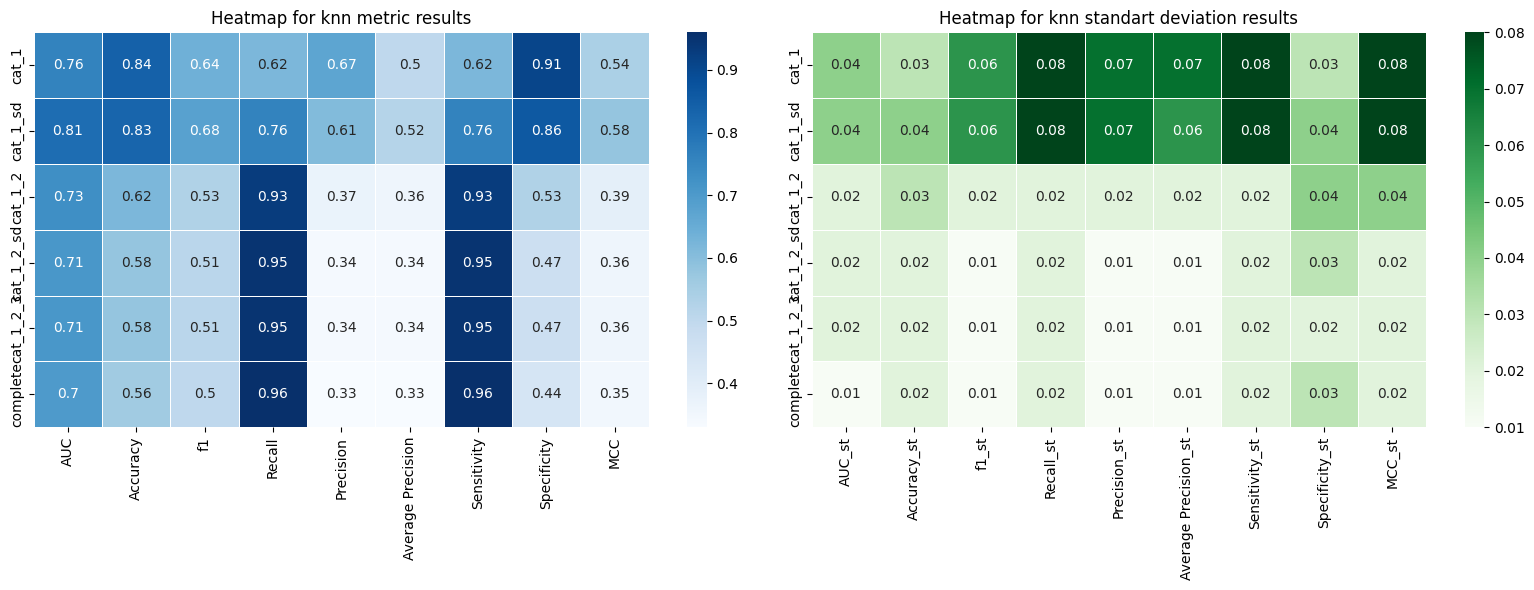

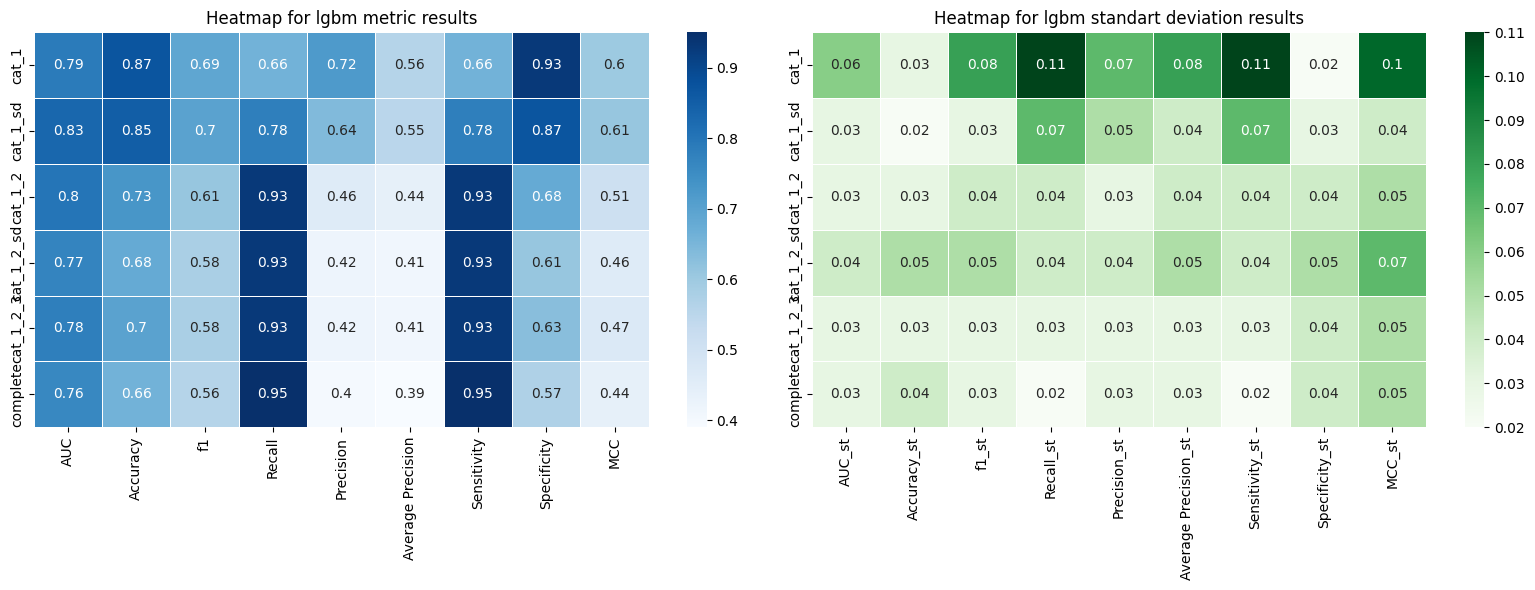

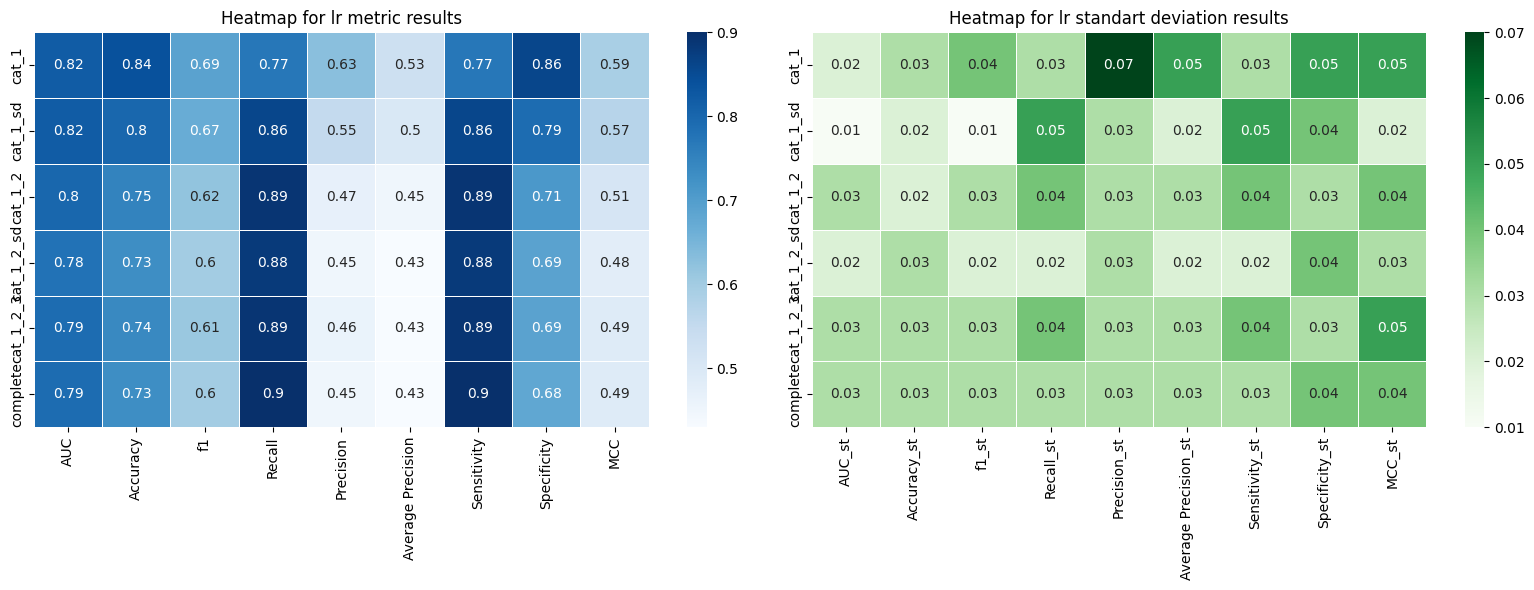

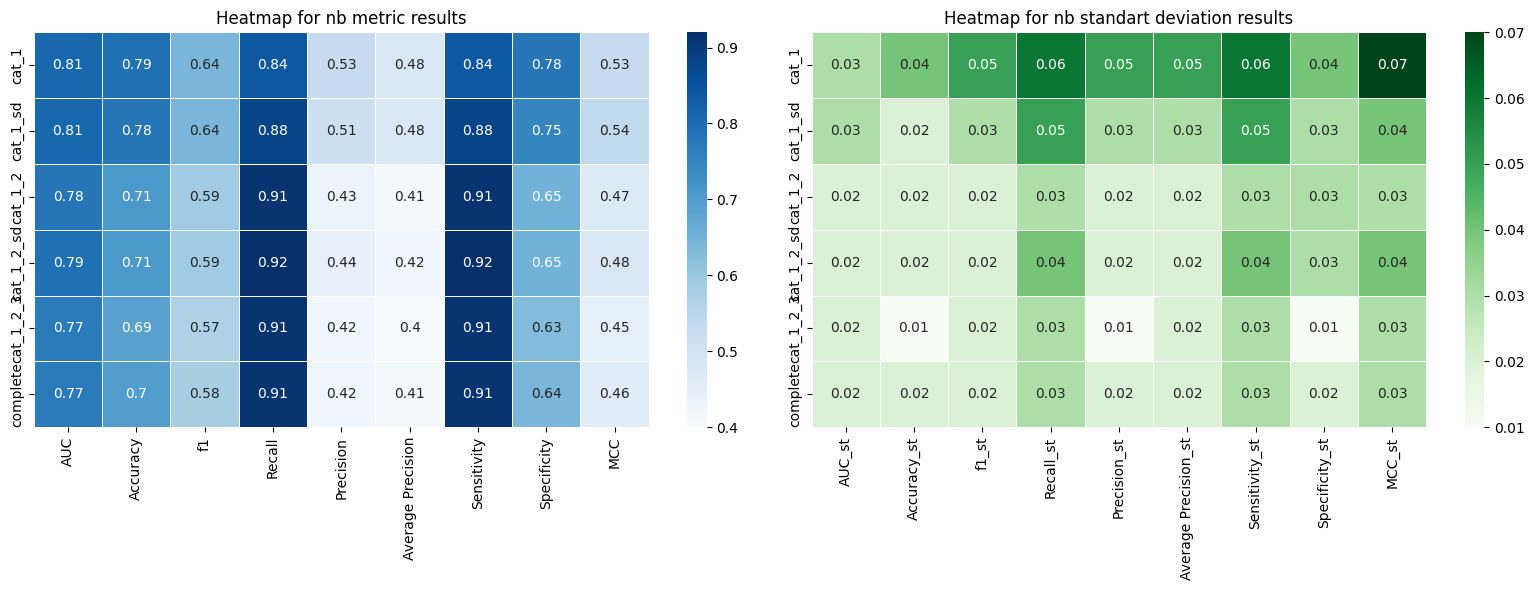

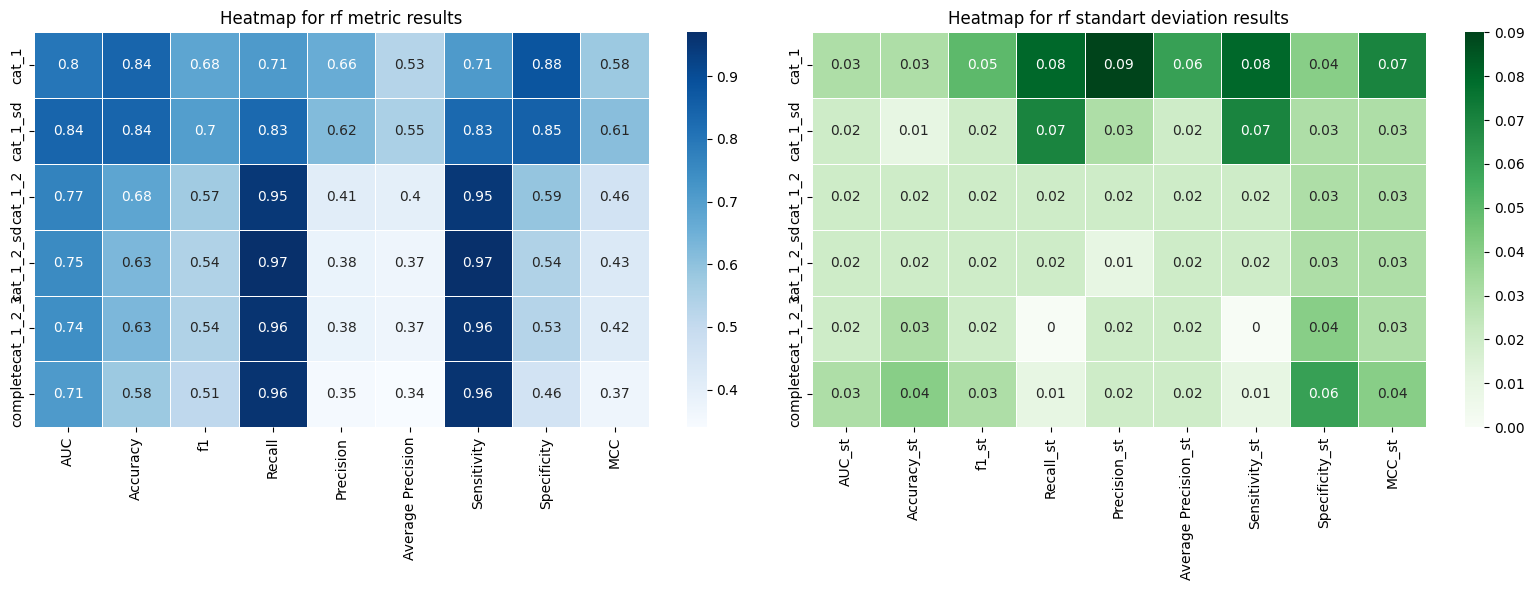

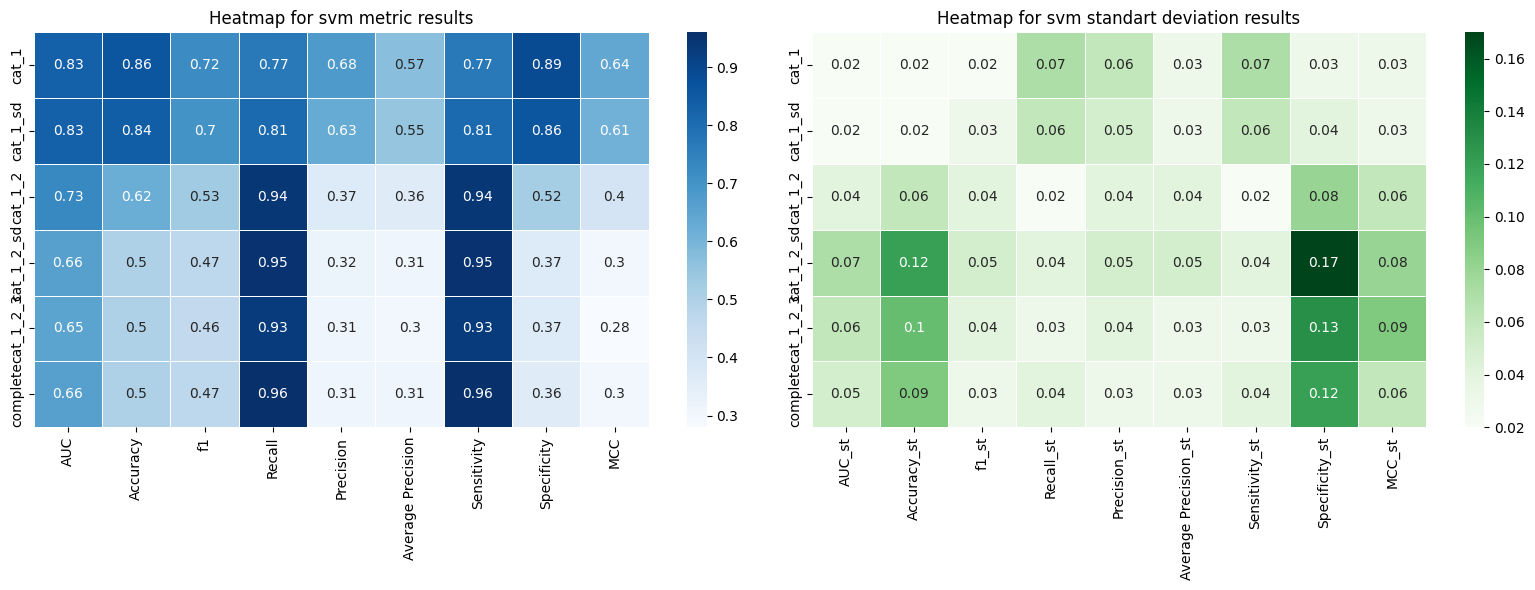

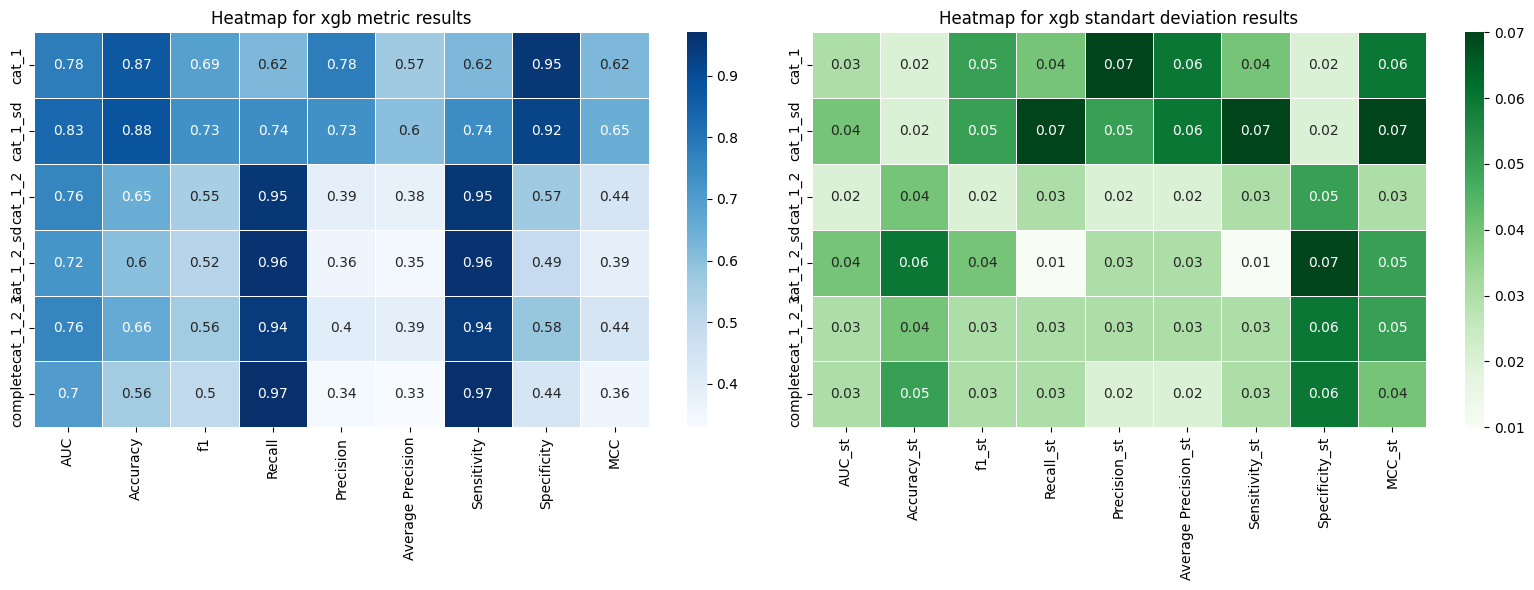

In [14]:
model_keys_not_scaled = list(not_scaled_dict.keys())

for model in model_keys_not_scaled:
    not_scaled_metric_df, not_scaled_st_df = clean_df(not_scaled_dict[model])

    make_heatmap(not_scaled_metric_df, not_scaled_st_df, model)



## Only cat_1_sd

In [15]:
def make_heatmap_dataset(dataset1,dataset2,model_name,info):

    

    # Get the labels for the y-axis
    y_labels1 = dataset1.iloc[:, 1]
    y_labels2 = dataset2.iloc[:, 1]

    # Drop the first column to create the heatmaps
    dataset1 = dataset1.iloc[:, 2:]
    dataset2 = dataset2.iloc[:, 2:]

    # Create the figure with specified figsize
    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    # Create the heatmaps
    sns.heatmap(dataset1, cmap="Blues", annot=True, linewidths=.5, yticklabels=y_labels1, ax=axes[0])
    sns.heatmap(dataset2, cmap="Greens", annot=True, linewidths=.5, yticklabels=y_labels2, ax=axes[1])

    # Add the model names to the titles
    axes[0].set_title(f"Heatmap for {model_name} {info} metric results")
    axes[1].set_title(f"Heatmap for {model_name} {info} standart deviation results")

    plt.tight_layout()
    plt.show()

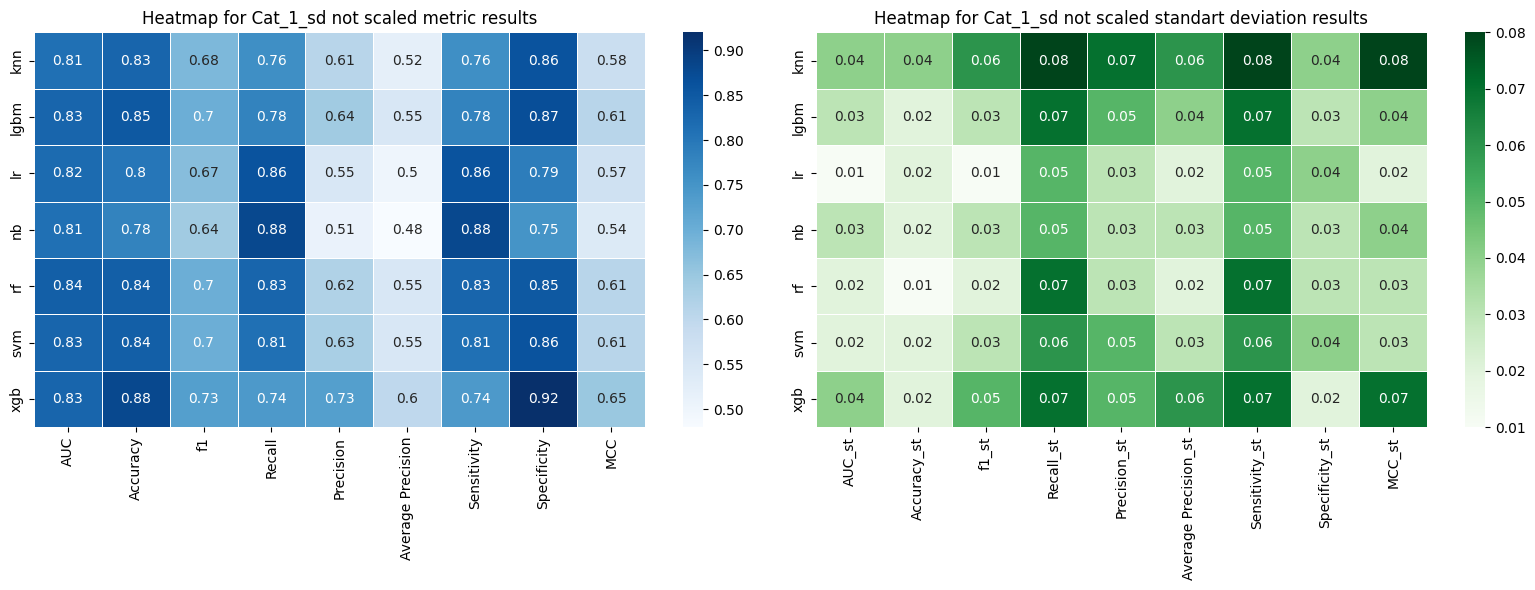

In [16]:
cat_1_sd_metrics_list=[]
cat_1_sd_st_list=[]

for model in model_keys_not_scaled:
    not_scaled_metric_df, not_scaled_st_df = clean_df(not_scaled_dict[model])
    cat_1_sd_metrics_list.append(not_scaled_metric_df[not_scaled_metric_df['dataset_name']=='cat_1_sd'])
    cat_1_sd_st_list.append(not_scaled_st_df[not_scaled_st_df['dataset_name']=='cat_1_sd'])


cat_1_sd_metrics_df=pd.concat(cat_1_sd_metrics_list, ignore_index=True)
cat_1_sd_st_df=pd.concat(cat_1_sd_st_list, ignore_index=True)

make_heatmap_dataset(cat_1_sd_metrics_df, cat_1_sd_st_df,"Cat_1_sd","not scaled")

# Scaled results

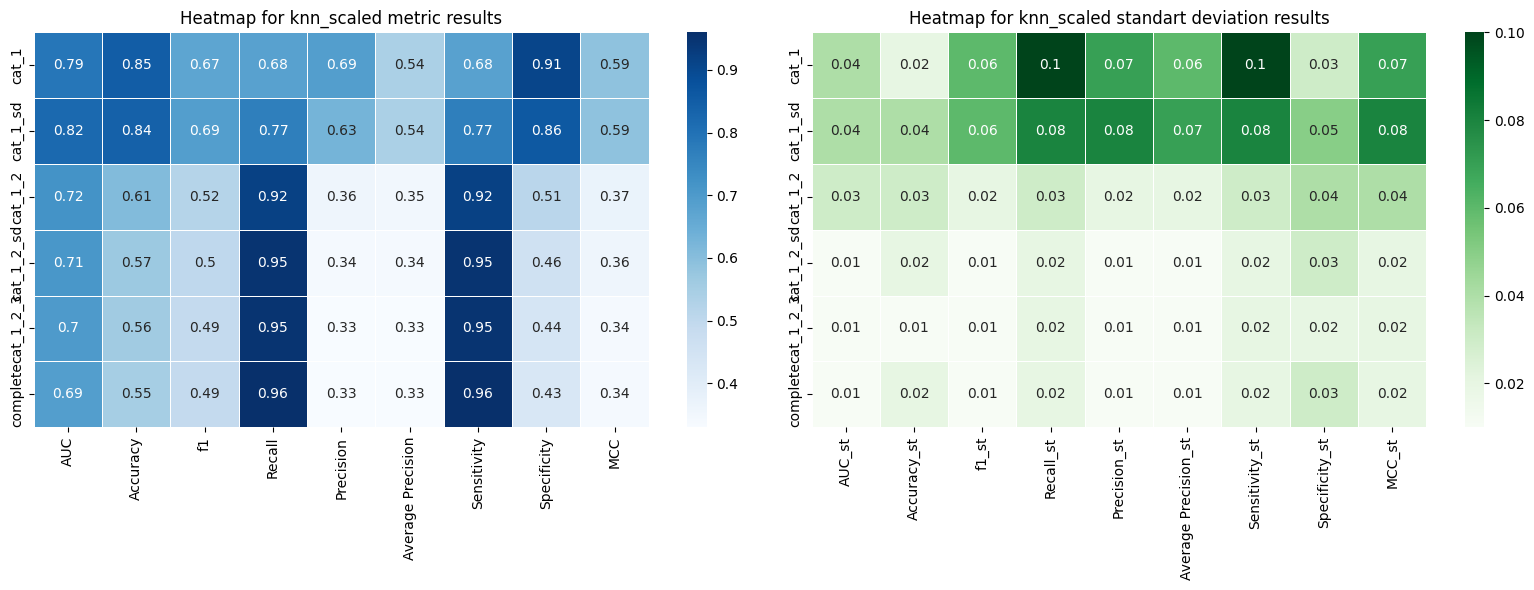

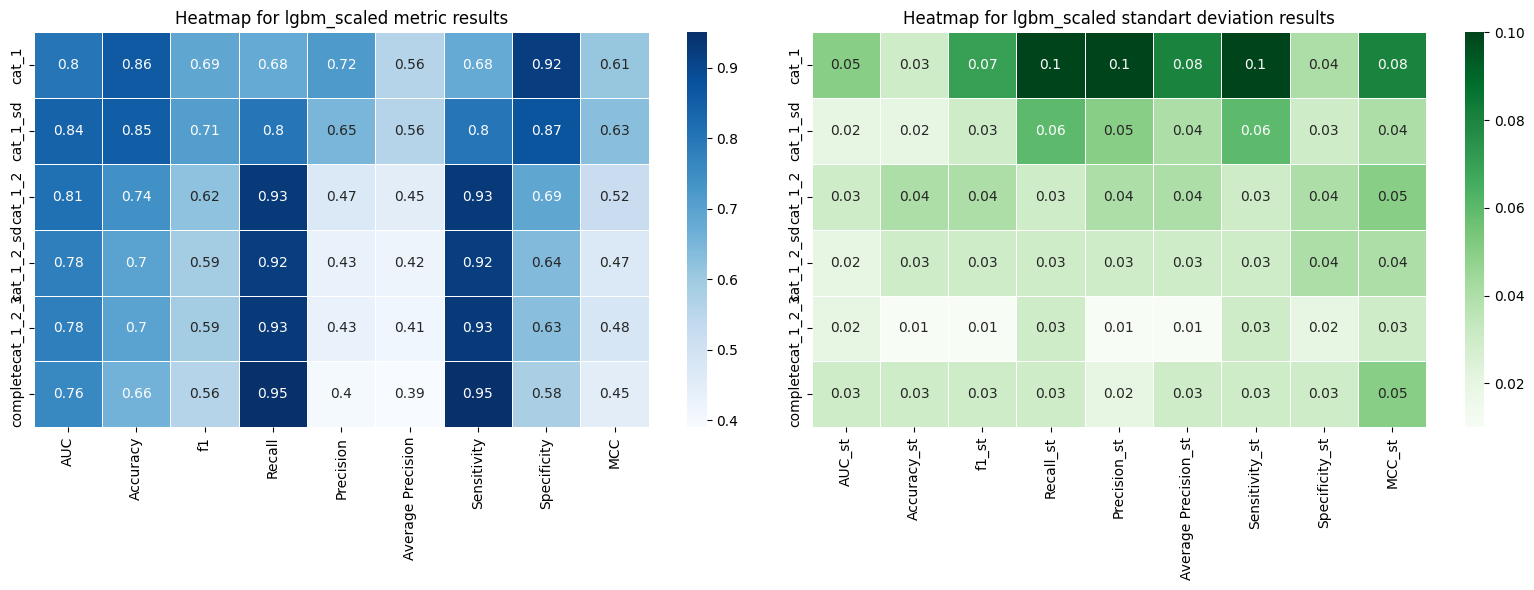

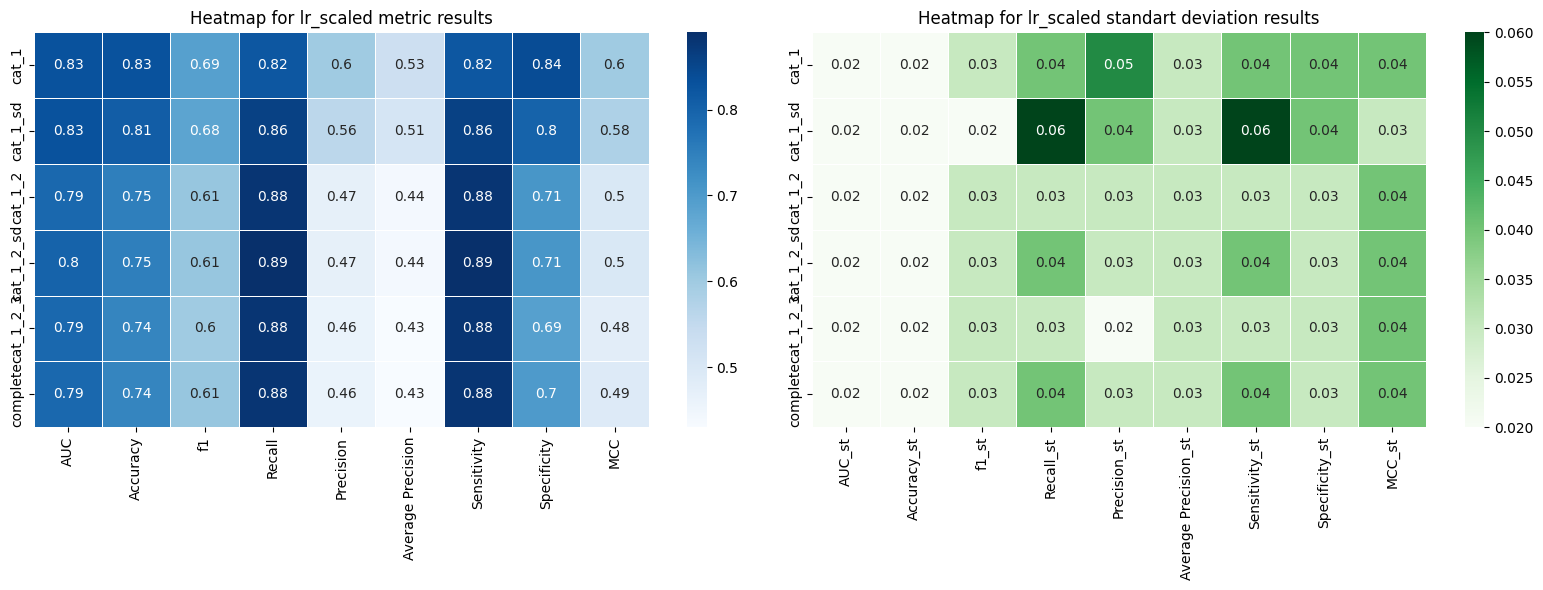

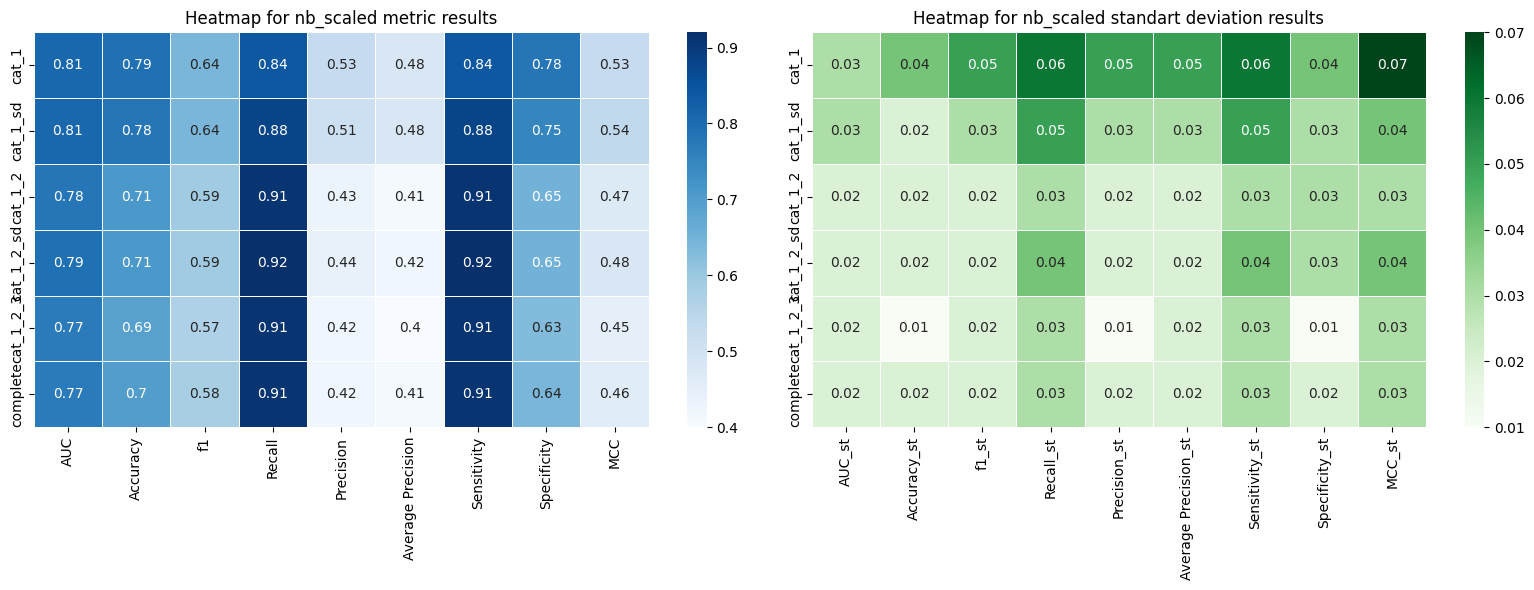

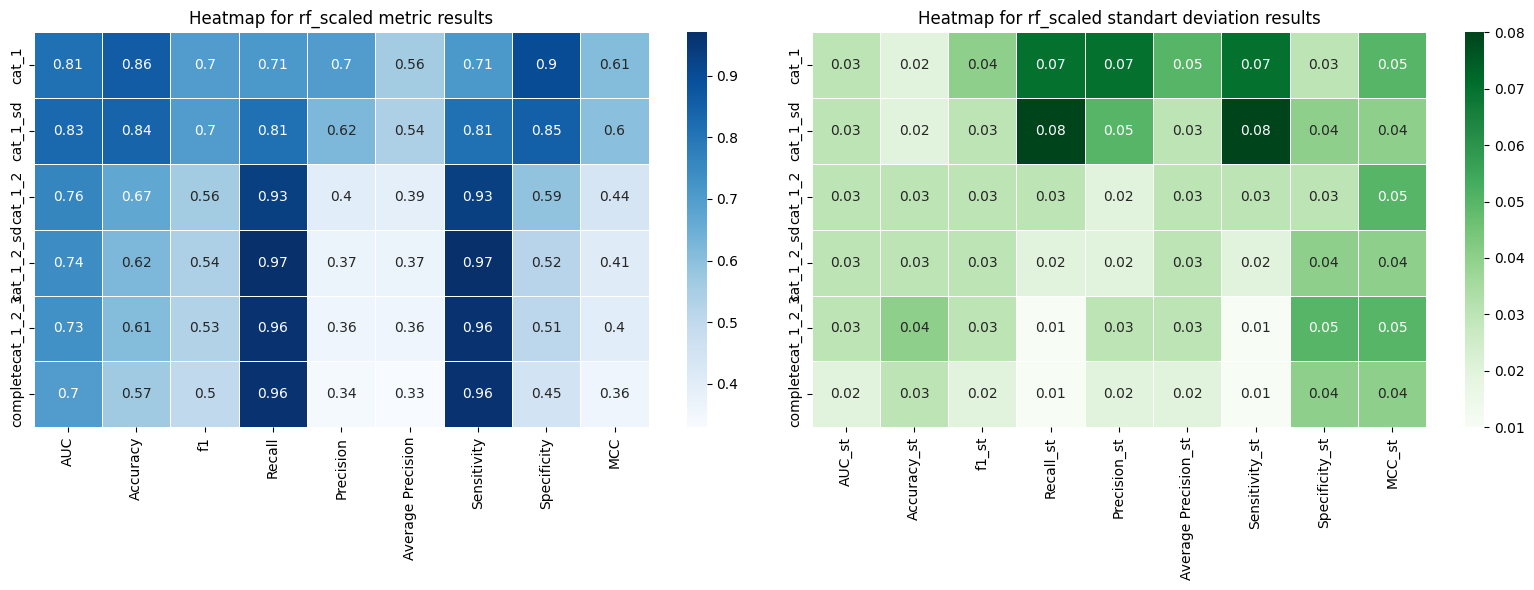

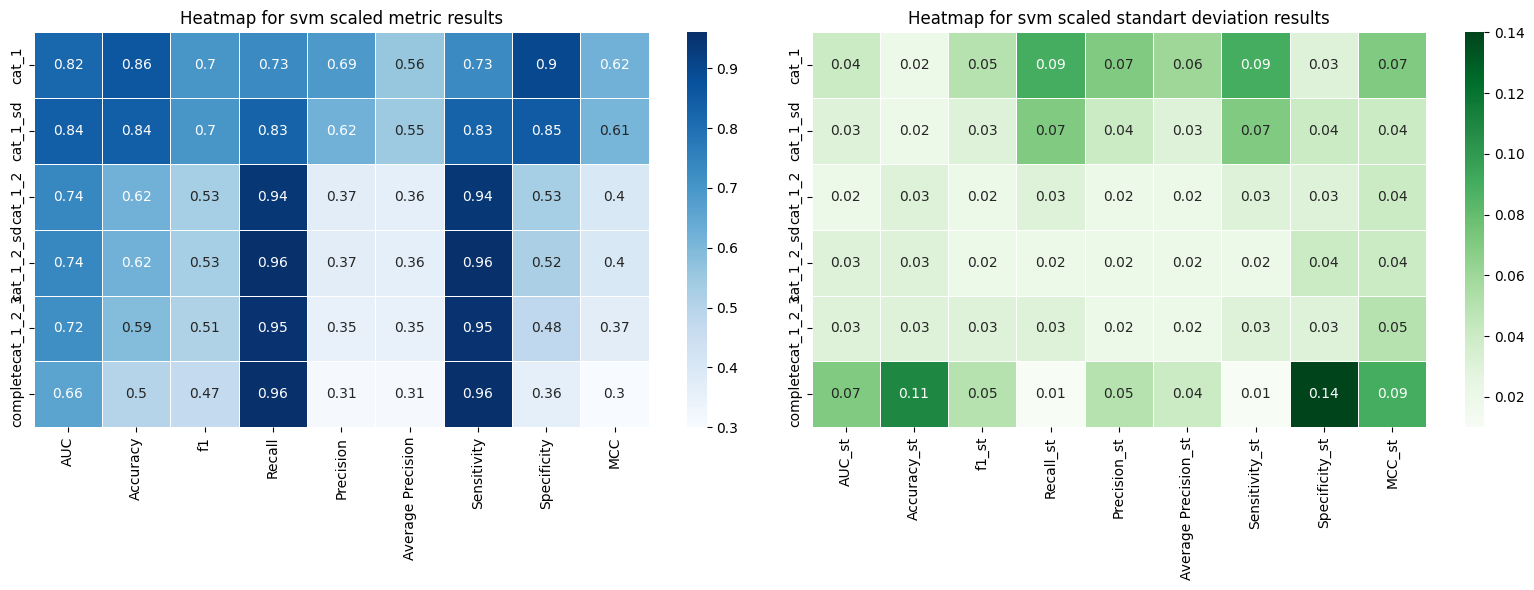

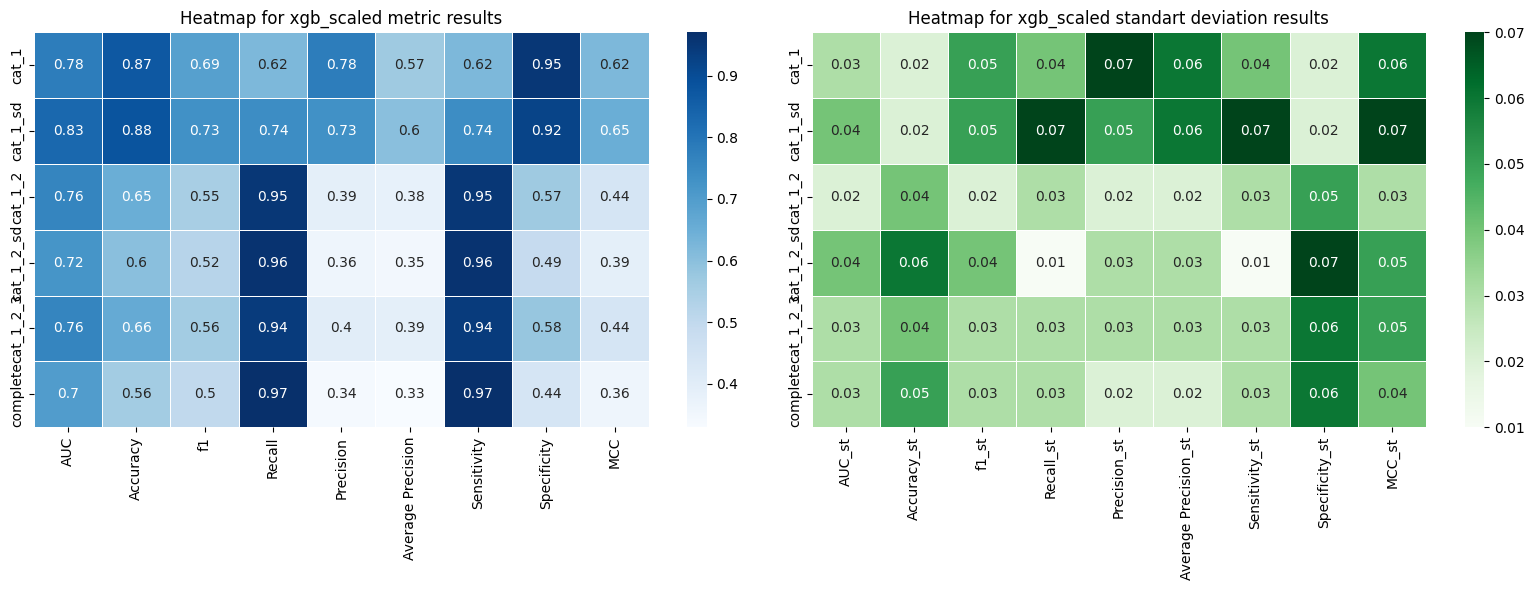

In [17]:
model_keys_scaled = list(scaled_dict.keys())

for model in model_keys_scaled:
    scaled_metric_df, scaled_st_df = clean_df(scaled_dict[model])

    make_heatmap(scaled_metric_df, scaled_st_df, model)


## Only cat_1_sd

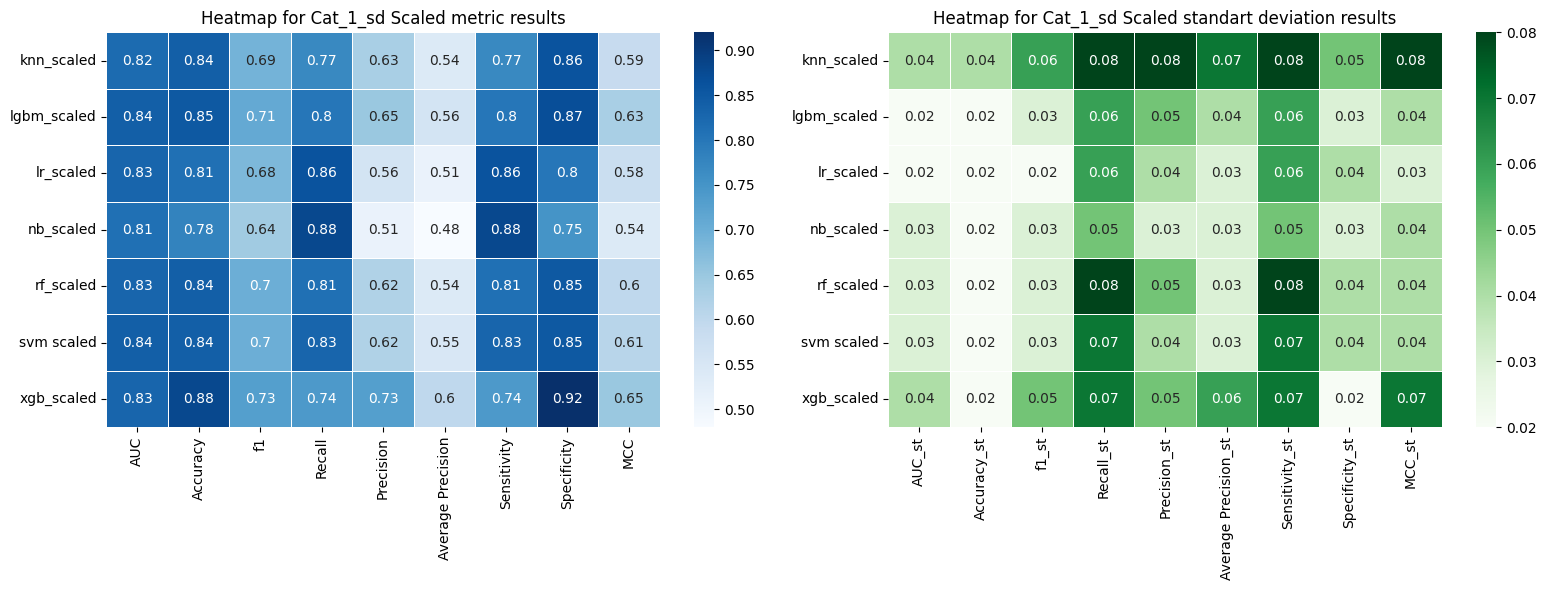

In [18]:
cat_1_sd_metrics_list=[]
cat_1_sd_st_list=[]

for model in model_keys_scaled:
    scaled_metric_df, scaled_st_df = clean_df(scaled_dict[model])   
    cat_1_sd_metrics_list.append(scaled_metric_df[scaled_metric_df['dataset_name']=='cat_1_sd'])
    cat_1_sd_st_list.append(scaled_st_df[scaled_st_df['dataset_name']=='cat_1_sd'])


cat_1_sd_metrics_df=pd.concat(cat_1_sd_metrics_list, ignore_index=True)
cat_1_sd_st_df=pd.concat(cat_1_sd_st_list, ignore_index=True)

make_heatmap_dataset(cat_1_sd_metrics_df, cat_1_sd_st_df,"Cat_1_sd","Scaled")

# Old Code


In [19]:
def make_heatmap(data, ax):
    dataset, model_name = data

    # Create the heatmap
    sns.heatmap(dataset, cmap="crest", annot=True, linewidths=.5, ax=ax)

    # Add the model name to the title
    ax.set_title(f'{model_name} Performance Metrics Heatmap')
    ax.set_xlabel('Performance Metric')
    ax.set_ylabel('dataset_name')

    plt.tight_layout()
    plt.show()

    

In [20]:
data_list = [logistic_regression, random_forest, svm, knn, lightgbm, xgboost]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

axes = axes.flatten()

for data, ax in zip(data_list, axes):
    make_heatmap(data, ax=ax)  # Pass ax as an argument

plt.tight_layout()
plt.show()


NameError: name 'logistic_regression' is not defined